In [2]:
import os
print(f"Current working folder: {os.getcwd()}")

os.chdir('D:/My Document/Khóa Luận Tốt Nghiệp/Model Reposity/RAG_LLM_DA')
print(f"Current working folder: {os.getcwd()}")

from utils import load_json_data, write_lines_to_file, read_lines_from_file, save_json_data
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from stages.stage_1_learn_rules_from_data.data_loader import DataLoader

source_data = "datasets/YAGO"
destination_data = "datasets/icews14"

Current working folder: d:\My Document\Khóa Luận Tốt Nghiệp\Model Reposity\RAG_LLM_DA\notebooks
Current working folder: D:\My Document\Khóa Luận Tốt Nghiệp\Model Reposity\RAG_LLM_DA


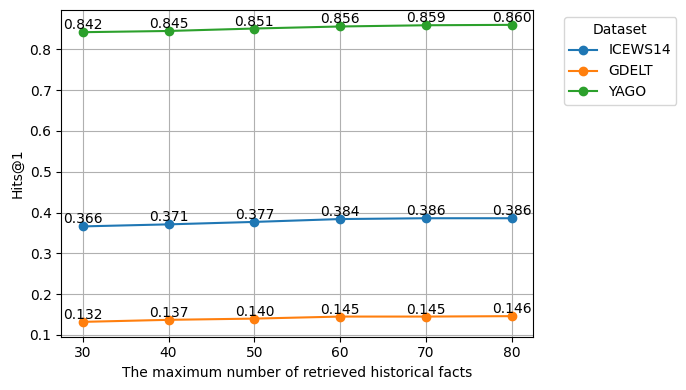

In [7]:


# Dữ liệu  
history_length = [30, 40, 50, 60, 70, 80]  
hits = {  
    'ICEWS14': [0.366, 0.371, 0.377, 0.384, 0.386, 0.386],   
    'GDELT': [0.132, 0.137, 0.140, 0.145, 0.145, 0.146],  
    'YAGO': [0.842, 0.845, 0.851, 0.856, 0.859, 0.860]  
}  

# Vẽ đồ thị  
plt.figure(figsize=(7, 4))  

for dataset, values in hits.items():  
    plt.plot(history_length, values, marker='o', label=dataset)  

# Thêm nhãn và tiêu đề  
plt.xlabel('The maximum number of retrieved historical facts')  
plt.ylabel('Hits@1')  
plt.xticks(history_length)  
plt.yticks(np.arange(0.1, 0.9, 0.1))  

# Thêm giá trị vào các điểm dữ liệu
for i, dataset in enumerate(hits):  
    for j, value in enumerate(hits[dataset]):  
        plt.text(history_length[j], value, f'{value:.3f}', ha='center', va='bottom')  

# Thêm lưới và chú thích  
plt.grid(True)  
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

# Hiển thị đồ thị  
plt.tight_layout()  
plt.show()

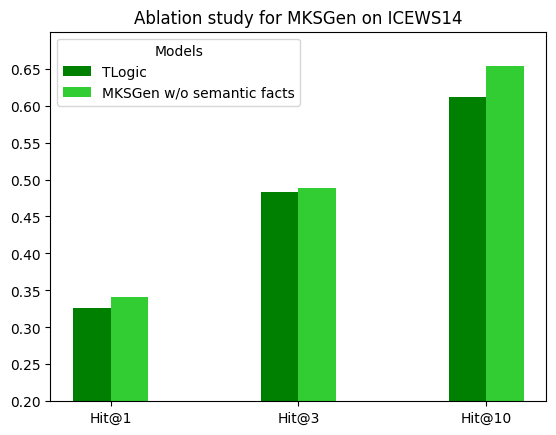

In [1]:
import matplotlib.pyplot as plt  
import numpy as np  

# Dữ liệu  
labels = ['Hit@1', 'Hit@3', 'Hit@10']  
our_model = [0.341, 0.489, 0.653]
tlogic = [0.326, 0.483, 0.612]

x = np.arange(len(labels))  # vị trí của các thanh  
width = 0.2  # chiều rộng của các thanh  

# Vẽ đồ thị  
fig, ax = plt.subplots()  
bars2 = ax.bar(x - width/2, tlogic, width, label='TLogic', color='green')  
bars3 = ax.bar(x + width/2, our_model, width, label='MKSGen w/o semantic facts', color='limegreen')  
# bars4 = ax.bar(x + width*1.5, our_model, width, label='MKSGen w/o RL', color='dodgerblue')  

# Thêm nhãn và tiêu đề  
ax.set_title('Ablation study for MKSGen on ICEWS14')  
ax.set_xticks(x)  
ax.set_xticklabels(labels)  
ax.legend(title='Models')  

# Hiển thị đồ thị  
plt.ylim(0.2, 0.7)  # Thiết lập giới hạn cho trục y  
# plt.ylabel('Hit@1')
plt.yticks(np.arange(0.2, 0.7, 0.05)) 
plt.show()

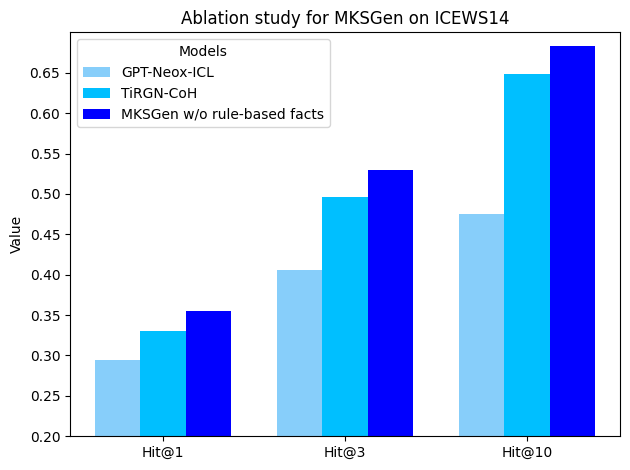

In [16]:
import matplotlib.pyplot as plt  
import numpy as np  

# Danh sách nhãn trên trục X  
labels = ["Hit@1", "Hit@3", "Hit@10"]  

# Dữ liệu (ước lượng từ biểu đồ)  
GPT_Neox_ICL = [0.295, 0.406, 0.475]  
TiRGN_CoH = [0.33, 0.496, 0.649]  
MKSGen_no_RL = [0.355, 0.53, 0.683]  

x = np.arange(len(labels))  # vị trí các nhóm cột  
width = 0.25  # độ rộng mỗi cột  

fig, ax = plt.subplots()  

# Vẽ các cột từng nhóm  
rects1 = ax.bar(x - width, GPT_Neox_ICL, width,   
                label="GPT-Neox-ICL", color="lightskyblue")  
rects2 = ax.bar(x, TiRGN_CoH, width,   
                label="TiRGN-CoH", color="deepskyblue")  
rects3 = ax.bar(x + width, MKSGen_no_RL, width,   
                label="MKSGen w/o rule-based facts", color="blue")  

# Đặt tiêu đề và nhãn  
ax.set_title("Ablation study for MKSGen on ICEWS14")  
ax.set_xticks(x)  
ax.set_xticklabels(labels)  
ax.set_ylabel("Value")  
ax.set_ylim(0.2, 0.7)  # giới hạn trục Y (chỉnh tùy ý)  
plt.yticks(np.arange(0.2, 0.7, 0.05)) 
ax.legend(title="Models")  

plt.tight_layout()  
plt.show()